In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier



def human_format(num):
    num = float('{:.3g}'.format(num))
    magnitude = 0
    while abs(num) >= 1000:
        magnitude += 1
        num /= 1000.0
    return '{}{}'.format('{:f}'.format(num).rstrip('0').rstrip('.'), ['', 'K', 'M', 'B', 'T'][magnitude])


In [68]:

DF = pd.read_csv('http://biostat.mc.vanderbilt.edu/wiki/pub/Main/DataSets/titanic3.csv')

In [69]:
DF.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [70]:
DF.columns

Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')

In [71]:
for y in DF.columns:
    if(DF[y].dtype == np.float64 or DF[y].dtype == np.int64):
          DF[y] = DF[y].fillna(999)
    if(DF[y].dtype == np.object):
           DF[y] = DF[y].fillna('Missing') 
    else:
        DF[y] =DF[y]  #this does not clean booleans or dates   

In [72]:
DF['survived_label'] = np.where(DF['survived'] == 1,'Survived','Died') 

In [73]:
DF.groupby(['survived','survived_label']).size()

survived  survived_label
0         Died              809
1         Survived          500
dtype: int64

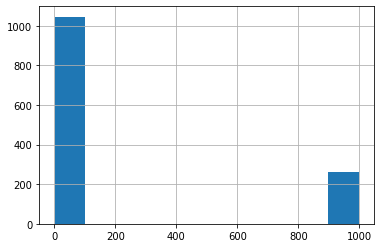

In [75]:
DF['age'].hist()

In [76]:
classpiv = pd.pivot_table(data=DF
                     ,values = ['ticket']
                     ,index = ['pclass','sex']
                     ,columns = ['survived_label']
                     ,aggfunc=np.count_nonzero  #np.sum
                     #,aggfunc = {'ORDER_ID': np.count_nonzero}
                     ,fill_value = 0)  

classpiv.columns = classpiv.columns.droplevel(0)

classpiv['died_ratio'] =  classpiv['Died'] / classpiv.sum(axis=1)

classpiv

survived_label  Died  Survived  died_ratio
pclass sex                                
1      female      5       139    0.034722
       male      118        61    0.659218
2      female     12        94    0.113208
       male      146        25    0.853801
3      female    110       106    0.509259
       male      418        75    0.847870

In [77]:
X = DF[['pclass','sex']]
X.head()

,pclass,sex
0,1,female
1,1,male
2,1,female
3,1,male
4,1,female


In [78]:
y = DF['survived_label']

cls_name= list(DF['survived_label'].unique())

cls_name.sort()

print(type(cls_name))

print(y)
print(cls_name)               

<class 'list'>
0       Survived
1       Survived
2           Died
3           Died
4           Died
          ...   
1304        Died
1305        Died
1306        Died
1307        Died
1308        Died
Name: survived_label, Length: 1309, dtype: object
['Died', 'Survived']


In [79]:
tree = DecisionTreeClassifier(max_depth = 3)
tree.fit(X,y)

ValueError: could not convert string to float: 'female'

In [50]:
# Visualize Decision Tree
from sklearn.tree import export_graphviz

# Creates dot file named tree.dot
export_graphviz(
            tree,
            out_file =  "titanit_v1.dot",
            feature_names = list(X.columns),
            class_names = cls_name,#'survived', #iris.target_names,
            filled = True,
            rounded = True)